In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer

from tools import plot_confusion_matrix

In [2]:
df = pd.read_csv('../data/datatran2017.csv', sep=';', encoding="latin1")
df.shape

(89518, 30)

In [3]:
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,8,2017-01-01,domingo,00:00:00,PR,376.0,112,PARANAVAI ...,Fenômenos da Natureza ...,Queda de ocupante de veículo ...,...,1,0,0,1,1,-23.098807,-52.387894,SR-PR,DEL7/7,UOP05/PR
1,9,2017-01-01,domingo,00:01:00,SC,101.0,234,PALHOCA ...,Falta de Atenção à Condução ...,Colisão com objeto estático ...,...,0,1,0,0,1,-27.810100,-48.635700,SR-SC,DEL8/1,UOP02/SC
2,11,2017-01-01,domingo,00:00:00,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA ...,Animais na Pista ...,Capotamento ...,...,0,0,0,2,1,-23.369520,309.935131,SR-PR,DEL7/7,UOP07/PR
3,12,2017-01-01,domingo,00:00:00,GO,153.0,435,ANAPOLIS ...,Avarias e/ou desgaste excessivo no pneu ...,Tombamento ...,...,1,0,0,1,1,-16.274737,-48.969090,SR-GO,DEL1/2,UOP01/GO
4,13,2017-01-01,domingo,00:00:00,SC,280.0,"77,3",CORUPA ...,Ingestão de Álcool ...,Saída de leito carroçável ...,...,0,0,0,1,1,-26.446752,-49.201670,SR-SC,DEL8/6,UOP03/SC


In [4]:
df['hora'] = df.horario.apply(lambda x: x.split(':')[0])
df['ano'] = df.data_inversa.apply(lambda x: x.split('-')[0])
df['mes'] = df.data_inversa.apply(lambda x: x.split('-')[1])
df['dia'] = df.data_inversa.apply(lambda x: x.split('-')[2])

df.drop(['horario', 'data_inversa', 'id'], axis=1, inplace=True)

In [5]:
df.columns

Index(['dia_semana', 'uf', 'br', 'km', 'municipio', 'causa_acidente',
       'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'hora', 'ano', 'mes', 'dia'],
      dtype='object')

In [6]:
df.classificacao_acidente.value_counts()

Com Vítimas Feridas    53647
Sem Vítimas            30689
Com Vítimas Fatais      5182
Name: classificacao_acidente, dtype: int64

In [8]:
value = {
    'Com Vítimas Feridas': 1,
    'Sem Vítimas': 0,
    'Com Vítimas Fatais': 2
}

In [9]:
dd = df[['dia_semana', 'uf', 'br', 'km', 'causa_acidente', 'tipo_acidente', 
        'fase_dia', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'classificacao_acidente']]
dd.dropna(inplace=True)

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
X = pd.get_dummies(dd.drop(['classificacao_acidente'], axis=1))
y = dd['classificacao_acidente'].apply(lambda x: value[x]).reshape(-1, 1)

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LogisticRegression()

parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.5, 1., 1.5],
    'class_weight': ['balanced', None]
}


scorer = make_scorer(score_func=accuracy_score)

grid_obj = GridSearchCV(model, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-v

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-v

In [20]:
best_clflf

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
joblib.dump(best_clf, '../model/modelo_v0_logistic_regression.pkl') 

['../model/modelo_v0_logistic_regression.pkl']

In [22]:
y_pred = best_clf.predict(X_test)

Confusion matrix, without normalization
[[2021 4199    4]
 [1375 9225   14]
 [ 102  924   11]]


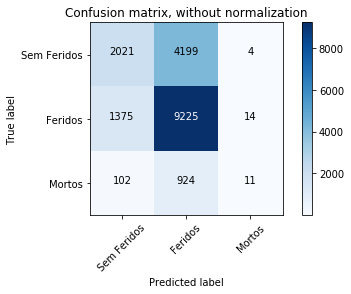

In [23]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Sem Feridos', 'Feridos', 'Mortos'],
                      title='Confusion matrix, without normalization')

In [24]:
accuracy_score(y_test, y_pred)

0.6297622377622377

In [25]:
precision0 = cnf_matrix[0,0] / (cnf_matrix[0,0] + cnf_matrix[1,0] + cnf_matrix[1,2])
recall0 = cnf_matrix[0,0] / (cnf_matrix[0,0] + cnf_matrix[0,1] + cnf_matrix[0,2])

print('Precision classe de sem vítimas: ', precision0)
print('Recall classe de sem vítimas: ', recall0)
print('F1 classe de sem vítimas: ', 1 * ((precision0 * recall0) / (precision0 + recall0)))

precision1 = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[0,1] + cnf_matrix[2,1])
recall1 = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[1,0] + cnf_matrix[1,2])

print('Precision classe de feridos: ', precision1)
print('Recall classe de feridos: ', recall1)
print('F1 classe de feridos: ', 1 * ((precision1 * recall1) / (precision1 + recall1)))

precision2 = cnf_matrix[2,2] / (cnf_matrix[2,2] + cnf_matrix[0,2] + cnf_matrix[1,2])
recall2 = cnf_matrix[2,2] / (cnf_matrix[2,2] + cnf_matrix[2,0] + cnf_matrix[2,1])

print('Precision classe de mortos: ', precision2)
print('Recall classe de mortos: ', recall2)
print('F1 classe de mortos: ', 1 * ((precision2 * recall2) / (precision2 + recall2)))

Precision classe de sem vítimas:  0.5926686217008797
Recall classe de sem vítimas:  0.3247107969151671
F1 classe de sem vítimas:  0.20977787004359558
Precision classe de feridos:  0.6429467521605798
Recall classe de feridos:  0.8691351045788581
F1 classe de feridos:  0.3695617338354299
Precision classe de mortos:  0.3793103448275862
Recall classe de mortos:  0.010607521697203472
F1 classe de mortos:  0.010318949343339587
